Softmax回归:

Softmax回归虽然名为回归,但是一般用分类问题.考虑我们的样本数据集中有一系列的特征变量$\mathbf{X}=[x_1,x_2,x_3...x_n]^T$,同时有k个类别.现在我们需要构建出一个模型,能够根据输入的特征变量预测出样本属于k个类别中的哪一个.

首先要处理的是如何表示类别.在二分类问题中,我们可以使用0和1来表示两个类别,但是在多分类问题中,我们需要使用独热编码(One-Hot Encoding)来表示类别.例如,如果有3个类别,那么类别1可以表示为[1,0,0],类别2表示为[0,1,0],类别3表示为[0,0,1].

Softmax回归的模型结构如下:
$$
y_i=\frac{e^{o_i}}{\sum_{j=1}^{k} e^{o_j}},\quad o_i=w_{i1}x_1+w_{i2}x_2+...+w_{in}x_n+b_i
$$

利用Softmax回归函数,我们构建出了当输入特征变量$\mathbf{X}$时,该样本为每个类别的概率分布$Y=[y_1,y_2,y_3...y_k]^T$.

而该样本的类别则为预测概率最大的类别,即为
$$
\text{Type}=\text{arg}\max y_i
$$

为求解上述$o_i$中的权重参数$w_{ij}$以及偏移$b_i$,我们需要定义损失函数.Softmax回归一般使用交叉熵损失函数(Cross-Entropy Loss Function),其定义如下:

考虑样本为$\mathbf{X}$的数据集中,对应的类别转化的独热编码向量为$Y$,则数据集的整体联合概率为
$$
P(Y|\mathbf{X})=P(Y^{(1)},Y^{(2)}...Y^{(n)}|X^{(1)},X^{(2)}...X^{(n)})=\prod_{i=1}^{n} P(Y^{(i)}|X^{(i)})
$$

上述公式左式的另一实际含义为,在给定样本数据集$\mathbf{X}$的情况下,样本数据集对应类别为$Y$的条件概率.为使预测准确,我们希望上述条件概率最大化;根据最大似然估计,要使条件概率最大化,相当于最小化其负对数似然:
$$
-\log P(Y|\mathbf{X})=\sum_{i=1}^{n} -\log P(Y^{(i)}|X^{(i)})
$$

我们用信息论中的交叉熵来替换上式,则有
$$
-\log P(Y^{(i)}|X^{(i)})=l(y^{(i)},\hat{y}^{(i)})=-\sum_{j=1}^{k} y_j^{(i)} \log \hat{y}_j^{(i)}
$$

其中交叉熵代表了真实类别分布$y^{(i)}$与预测类别分布$\hat{y}^{(i)}$之间的差异.最终我们得到Softmax回归的损失函数为
$$
Loss(X,Y)=\sum_{i=1}^{n}\sum_{j=1}^{k}y_j^{(i)}\log \hat{y}_j^{(i)} 
$$

同样利用梯度下降,最小化损失函数,我们可以得到
$$
\mathbf{w}^{*},\mathbf{b}^{*}=\arg\min_{\mathbf{w},\mathbf{b}} Loss(X,Y)
$$

从零开始实现Softmax回归

In [2]:
import torch
import torchvision
from torch.utils import data
from torchvision import transforms
from d2l import torch as d2l
d2l.use_svg_display()

In [3]:
trans=transforms.ToTensor()
mnist_train=torchvision.datasets.MNIST(root='./data',train=True,transform=trans,download=True)
mnist_test=torchvision.datasets.MNIST(root='./data',train=False,transform=trans,download=True)


In [4]:
len(mnist_train),len(mnist_test)

(60000, 10000)

In [5]:
print(mnist_test[0][0].shape)  # 图像是28×28像素

torch.Size([1, 28, 28])


In [6]:
labels=[mnist_test[i][1] for i in range(len(mnist_test))]
unique_labels=list(set(labels))
print(unique_labels)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


In [7]:
mnist_test.data.shape

torch.Size([10000, 28, 28])

In [8]:
def get_handwritten_mnist_labels(labels):
    text_labels = ['0', '1', '2', '3', '4',
                   '5', '6', '7', '8', '9']
    return [text_labels[int(label)] for label in labels]

In [6]:
def get_fashion_mnist_labels(labels):
    text_labels = ['t-shirt', 'trouser', 'pullover', 'dress', 'coat',
                  'sandal','shirt','sneaker', 'bag', 'ankle boot']
    return [text_labels[int(label)] for label in labels]

In [5]:
def show_images(imgs, num_rows, num_cols,titles=None, scale=1.5):
    figsize = (num_cols * scale, num_rows * scale)
    _, axes = d2l.plt.subplots(num_rows, num_cols, figsize=figsize)
    for i in range(num_rows):
        for j in range(num_cols):
            axes[i][j].imshow(imgs[i * num_cols + j].reshape(28, 28), cmap='gray')
            axes[i][j].axes.get_xaxis().set_visible(False)
            axes[i][j].axes.get_yaxis().set_visible(False)
            if titles is not None:
                axes[i][j].set_title(titles[i * num_cols + j])
            else:
                axes[i][j].set_title("no title")
    return axes 

array([[<Axes: title={'center': '1'}>, <Axes: title={'center': '7'}>,
        <Axes: title={'center': '8'}>, <Axes: title={'center': '3'}>,
        <Axes: title={'center': '6'}>, <Axes: title={'center': '2'}>,
        <Axes: title={'center': '1'}>, <Axes: title={'center': '3'}>,
        <Axes: title={'center': '7'}>],
       [<Axes: title={'center': '3'}>, <Axes: title={'center': '4'}>,
        <Axes: title={'center': '6'}>, <Axes: title={'center': '5'}>,
        <Axes: title={'center': '4'}>, <Axes: title={'center': '4'}>,
        <Axes: title={'center': '9'}>, <Axes: title={'center': '6'}>,
        <Axes: title={'center': '7'}>]], dtype=object)

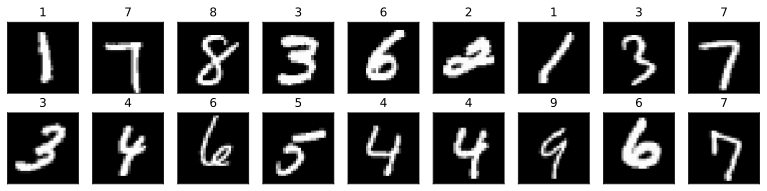

In [9]:
X,y=next(iter(data.DataLoader(mnist_train,batch_size=18,shuffle=True)))
show_images(X,2,9,titles=get_handwritten_mnist_labels(y))

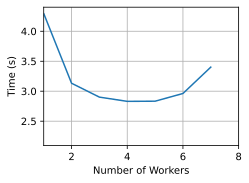

In [12]:
def get_dataloader_workers(i):  #@save
    """使用4个进程来读取数据"""
    
    return i
batch_size = 256
time_list=[]
for i in range(8):
    train_iter = data.DataLoader(mnist_train, batch_size, shuffle=True,
                                num_workers=get_dataloader_workers(i))
 
    timer=d2l.Timer()
    time=timer.start()
    for X, y in train_iter:
        continue
    time_list.append(timer.stop())

d2l.plot(time_list, xlabel='Number of Workers', ylabel='Time (s)', xlim=[1, 8])
    


In [13]:
train_iter = data.DataLoader(mnist_train, batch_size=100)
test_iter = data.DataLoader(mnist_test, batch_size=100)

In [14]:
num_inputs = 28*28
num_outputs = 10

w= torch.normal(0,0.01,size=(num_inputs,num_outputs),requires_grad=True)
b=torch.zeros(num_outputs,requires_grad=True)


In [15]:
def softmax(x):
     """Compute softmax values for each sets of scores in x."""
     x_exp = torch.exp(x - x.max(dim=1, keepdim=True).values)
     return x_exp / x_exp.sum(dim=1, keepdim=True)

In [16]:
X=torch.normal(0,1,(2,5))
result=softmax(X)
print(result)
print(result.sum(dim=1))  # 沿行相加，结果为1

tensor([[0.5094, 0.1195, 0.1373, 0.1015, 0.1323],
        [0.0307, 0.0748, 0.3645, 0.3284, 0.2016]])
tensor([1., 1.])


In [17]:
def net(X):
    return softmax(torch.matmul(X.reshape(-1,w.shape[0]),w)+b)

In [18]:
y=torch.tensor([0,1])
y_pred=torch.tensor([[0.1,0.5,0.4],[0.2,0.6,0.1]])
y_pred[[0,1],y]

tensor([0.1000, 0.6000])

In [19]:
def cross_entropy(y_pred, y):
    return -torch.log(y_pred[range(len(y_pred)), y])

print(range(len(y_pred)))
cross_entropy(y_pred,y)

range(0, 2)


tensor([2.3026, 0.5108])

In [20]:
def accuracy(y_pred, y):
    """accuracy of predicted labels and true labels"""
    if len(y_pred.shape) > 1 and y_pred.shape[1] > 1:
        y_pred = y_pred.argmax(axis=1)
    cmp = y_pred.type(y.dtype) == y
    return float(cmp.type(y.dtype).sum())


可以看到,第一个样本预测类别是1(该行的最大元素0.5,索引为1),这与实际标签0不一致.第二个样本的预测类别是1(该行的最大元素0.6,索引为1),这与实际标签1一致.因此,这两个样本的分类精度为
$$
auc=\frac{1}{2}=0.5
$$

In [21]:
accuracy(y_pred, y)/len(y)


0.5

In [22]:
def evaluate_accuracy(net, data_iter):
    """Evaluate accuracy of a model on a dataset."""
    if isinstance(net, torch.nn.Module):
        net.eval()  # Set the model to evaluation mode
    metric = d2l.Accumulator(2)  # No. of correct predictions, no. of predictions
    with torch.no_grad():
        for X, y in data_iter:
            metric.add(accuracy(net(X), y), y.numel())
    return metric[0] / metric[1]

In [23]:
evaluate_accuracy(net, test_iter)

0.0651

In [24]:
def train_epoch_ch3(net, train_iter, loss, updater):
    """The training function for one epoch defined in Chapter 3."""
    # Set the model to training mode
    if isinstance(net, torch.nn.Module):
        net.train()
    # Sum of training loss, sum of training accuracy, no. of examples
    metric = d2l.Accumulator(3)
    for X, y in train_iter:
        # Compute gradients and update parameters
        y_hat = net(X)
        l = loss(y_hat, y)
        if isinstance(updater, torch.optim.Optimizer):
            # Using PyTorch built-in optimizer and loss criterion
            updater.zero_grad()
            l.mean().backward()
            updater.step()
        else:
            # Using custom updater in Chapter 3 (minibatch stochastic gradient descent)
            l.sum().backward()
            updater(X.shape[0])
        # Update training loss and accuracy
        metric.add(float(l.sum()), accuracy(y_hat, y), y.numel())
    # Return training loss and training accuracy
    return metric[0] / metric[2], metric[1] / metric[2]

In [35]:
class animator:  #@save
    """Animate data plots."""
    def __init__(self, xlabel=None, ylabel=None, legend=None, xlim=None,
                 ylim=None, fmts=('-', 'm--', 'g-.', 'r:'), nrows=1,
                 ncols=1, figsize=(3.5, 2.5)):
        # Incrementally plot multiple lines
        self.fig, self.axes = d2l.plt.subplots(nrows, ncols, figsize=figsize)
        if nrows * ncols == 1:
            self.axes = [self.axes, ]
        # Use a lambda to capture arguments
        self.config_axes = lambda: d2l.set_axes(
            self.axes[0], xlabel, ylabel, xlim, ylim, legend)
        self.X, self.Y, self.fmts = None, None, fmts
    def add(self, x, y):
        # Add multiple data points into the figure
        if not hasattr(y, "__len__"):
            y = [y]
        n = len(y)
        if not hasattr(x, "__len__"):
            x = [x] * n
        if not self.X:
            self.X = [[] for _ in range(n)]
        if not self.Y:
            self.Y = [[] for _ in range(n)] 
        for i, (a, b) in enumerate(zip(x, y)):
            self.X[i].append(a)
            self.Y[i].append(b)
        self.axes[0].cla()
        for i, (x, y) in enumerate(zip(self.X, self.Y)):
            self.axes[0].plot(x, y, self.fmts[i])
        self.config_axes()
        display.display(self.fig)
        display.clear_output(wait=True)

In [56]:
from tqdm import tqdm
def train(net, train_iter, test_iter, loss, updater, num_epochs):
    """Train a model (defined in Chapter 3)."""
    animator = d2l.Animator(xlabel='epoch', xlim=[1, num_epochs],
                            legend=['train loss', 'train acc', 'test acc'])
    for epoch in tqdm(range(num_epochs), desc="训练进度"):
        train_metrics = train_epoch_ch3(net, train_iter, loss, updater)
        test_acc = evaluate_accuracy(net, test_iter)
        animator.add(epoch + 1, train_metrics + (test_acc,))
    train_loss, train_acc = train_metrics
    assert train_loss < 0.5, f'train_loss={train_loss}'
    assert train_acc <= 1 and train_acc > 0.7, f'train_acc={train_acc}'
    assert test_acc <= 1 and test_acc > 0.7, f'test_acc={test_acc}'

In [25]:
updater=torch.optim.SGD([w,b],lr=0.1)

训练进度: 100%|██████████| 10/10 [00:33<00:00,  3.30s/it]


test_acc: 0.923


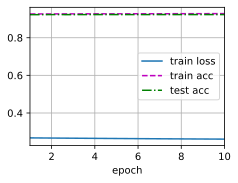

In [57]:
train(net, train_iter, test_iter, cross_entropy, updater, num_epochs=10)
print("test_acc:", evaluate_accuracy(net, test_iter))

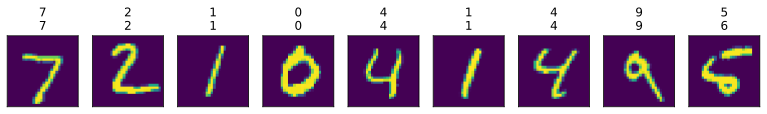

In [54]:
def predict(net, x,n):
    """Predict the labels of a batch of examples."""
    for X,y in test_iter:
        break
    trues_labels=get_handwritten_mnist_labels(y)
    pre_labels=get_handwritten_mnist_labels(net(X).argmax(dim=1))
    titles=[true+'\n'+pred for true, pred in zip(trues_labels, pre_labels)]
    d2l.show_images(X[0:n].reshape((n,28,28)),1,9,titles=titles[0:n])

predict(net,test_iter,9)

简洁实现Softmax回归

In [59]:
train_iter=data.DataLoader(mnist_train,batch_size=256,shuffle=True)
test_iter=data.DataLoader(mnist_test,batch_size=256,shuffle=True)

In [60]:
net=torch.nn.Sequential(
    torch.nn.Flatten(),
    torch.nn.Linear(784,10)
    )
def init_weights(m):
    if type(m) == torch.nn.Linear:
        torch.nn.init.normal_(m.weight, mean=0, std=0.01)
        
net.apply(init_weights)

Sequential(
  (0): Flatten(start_dim=1, end_dim=-1)
  (1): Linear(in_features=784, out_features=10, bias=True)
)

In [61]:
import torch.nn as nn
loss=nn.CrossEntropyLoss(reduction='none')

In [62]:
trainer=torch.optim.SGD(net.parameters(),lr=0.1)

训练进度: 100%|██████████| 10/10 [00:30<00:00,  3.06s/it]


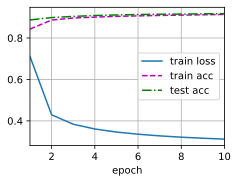

In [63]:
num_epochs = 10
train(net, train_iter, test_iter, loss, trainer, num_epochs=10)

In [ ]:
print   ("test_acc:", evaluate_accuracy(net, test_iter))


test_acc: 0.9176


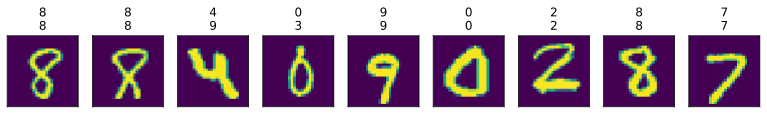

In [69]:
def predict(net, x,n):
    """Predict the labels of a batch of examples."""
    for X,y in test_iter:
        break
    trues_labels=get_handwritten_mnist_labels(y)
    pre_labels=get_handwritten_mnist_labels(net(X).argmax(dim=1))
    titles=[true+'\n'+pred for true, pred in zip(trues_labels, pre_labels)]
    d2l.show_images(X[0:n].reshape((n,28,28)),1,9,titles=titles[0:n])

predict(net,test_iter,9)